We have `n` jobs, where every job is scheduled to be done from `startTime[i]` to `endTime[i]`, obtaining a profit of `profit[i]`.

You're given the `startTime`, `endTime` and `profit` arrays, return the maximum profit you can take such that there are no two jobs in the subset with overlapping time range.

If you choose a job that ends at time `X` you will be able to start another job that starts at time `X`.

 <br>

**Example 1:**

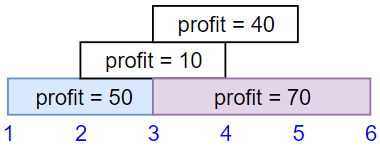

>**Input:** startTime = [1,2,3,3], endTime = [3,4,5,6], profit = [50,10,40,70]<br>
>**Output:** 120<br>
>**Explanation:** The subset chosen is the first and fourth job. <br>
>Time range [1-3]+[3-6] , we get profit of 120 = 50 + 70.


**Example 2:**

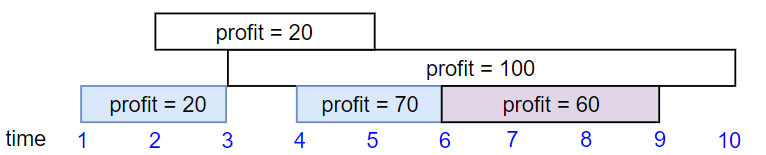

>**Input:** startTime = [1,2,3,4,6], endTime = [3,5,10,6,9], profit = [20,20,100,70,60]<br>
>**Output:** 150<br>
>**Explanation:** The subset chosen is the first, fourth and fifth job. <br>
>Profit obtained 150 = 20 + 70 + 60.


**Example 3:**

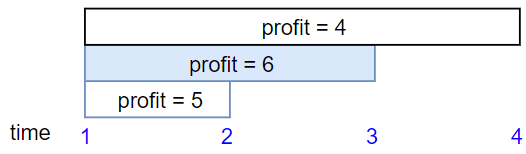

>**Input:** startTime = [1,1,1], endTime = [2,3,4], profit = [5,6,4]<br>
>**Output:** 6
 
 <br>

**Constraints:**

- >1 <= startTime.length == endTime.length == profit.length <= 5 * 10<sup>4</sup>
- >1 <= startTime[i] < endTime[i] <= 10<sup>9</sup>
- >1 <= profit[i] <= 10<sup>4</sup>

In [1]:
class Solution:
    def jobScheduling(self, startTime: list[int], endTime: list[int], profit: list[int]) -> int:
        import bisect
        
        jobs = sorted(zip(startTime, endTime, profit), key=lambda x: x[1])
        dp = [(0, 0)]

        for start, end, p in jobs:
            index = bisect.bisect_right(dp, (start, float('inf'))) - 1
            current_profit = dp[index][1] + p
            
            if current_profit > dp[-1][1]:
                dp.append((end, current_profit))

        return dp[-1][1]